# 6.4 Regression Analysis

## Contents
##### Import Libraries & Data
##### Data Prep for Regression Analysis
##### Regression Analysis

### Import Libraries & Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Define path
path = r'C:\\Users\\sstorer\\OneDrive\\Achievement 6 Project'

In [8]:
# Import dataframe
df = pd.read_csv(os.path.join(path, '02 Datasets', 'Prepared Data', 'mental_health_dataset_3.csv'), index_col = False)

In [10]:
df.head()

,Unnamed: 0,Country,Year,Prevalence - Mental disorders (Percent),Prevalence - Schizophrenia (Percent),Prevalence - Bipolar disorder (Percent),Prevalence - Eating disorders (Percent),Prevalence - Anxiety disorders (Percent),Prevalence - Drug use disorders (Percent),Prevalence - Depressive disorders (Percent),Prevalence - Alcohol use disorders (Percent),DALYs - Mental disorders (Percent),Burden of Disease - Mental disorders
0,0,Afghanistan,1990,16.659229,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670,Low
1,1,Afghanistan,1991,16.765052,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281,Low
2,2,Afghanistan,1992,16.874469,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189,Low
3,3,Afghanistan,1993,16.990720,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779,Low
4,4,Afghanistan,1994,17.112730,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986,Low


In [12]:
# Drop index column
df = df.drop('Unnamed: 0', axis=1)

In [59]:
# Export dataframe
df.to_csv(os.path.join(path, '02 Datasets', 'Prepared Data', 'mental_health_dataset_cleaned.csv'))

### Data Prep for Regression Analysis

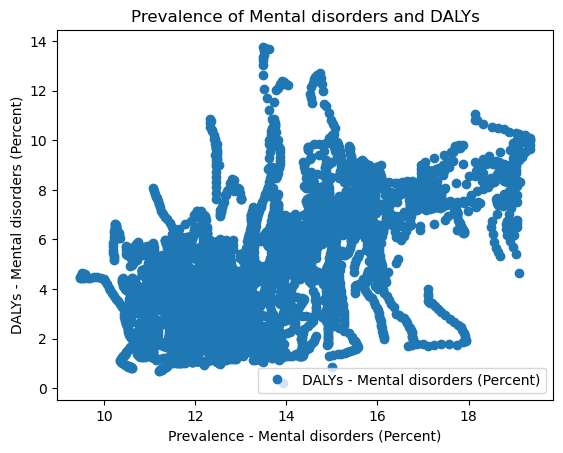

In [19]:
# Create a scatterplot using matplotlib for another look at how variables plot against each other.

DALYs_Mental_disorders = df.plot(x = 'Prevalence - Mental disorders (Percent)', y='DALYs - Mental disorders (Percent)',style='o')
plt.title('Prevalence of Mental disorders and DALYs')  
plt.xlabel('Prevalence - Mental disorders (Percent)')  
plt.ylabel('DALYs - Mental disorders (Percent)')  
plt.show()

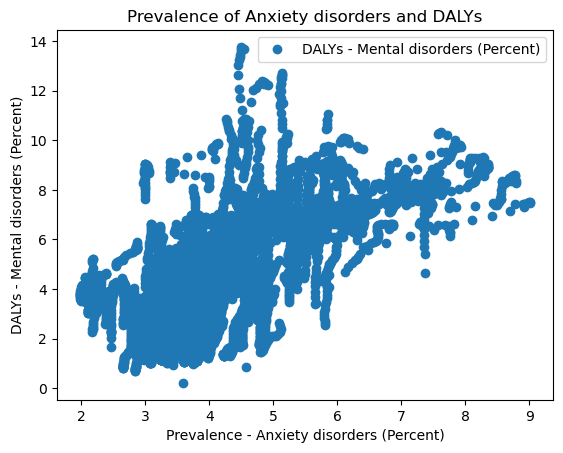

In [21]:
# Create a scatterplot using matplotlib for another look at how variables plot against each other.

DALYs_Anxiety_disorders = df.plot(x = 'Prevalence - Anxiety disorders (Percent)', y='DALYs - Mental disorders (Percent)',style='o')
plt.title('Prevalence of Anxiety disorders and DALYs')  
plt.xlabel('Prevalence - Anxiety disorders (Percent)')  
plt.ylabel('DALYs - Mental disorders (Percent)')  
plt.show()

In [23]:
# Export charts
DALYs_Mental_disorders.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'DALYs_Mental_disorder_Scatter.png'))
DALYs_Anxiety_disorders.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'DALYs_Anxiety_disorders_Scatter.png'))

#### Hypothesis
As the prevalence of anxiety disorders increases, the DALYs for Mental disorders increases.

In [30]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Prevalence - Anxiety disorders (Percent)'].values.reshape(-1,1)
y = df['DALYs - Mental disorders (Percent)'].values.reshape(-1,1)

In [32]:
X

array([[4.83512726],
       [4.82176536],
       [4.80143408],
       ...,
       [3.3305695 ],
       [3.31750007],
       [3.28393373]])

In [34]:
y

array([[1.69667048],
       [1.73428137],
       [1.79118945],
       ...,
       [2.36426505],
       [2.47294913],
       [2.52589178]])

In [36]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [40]:
# Create a regression object.

regression = LinearRegression()

In [42]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [44]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

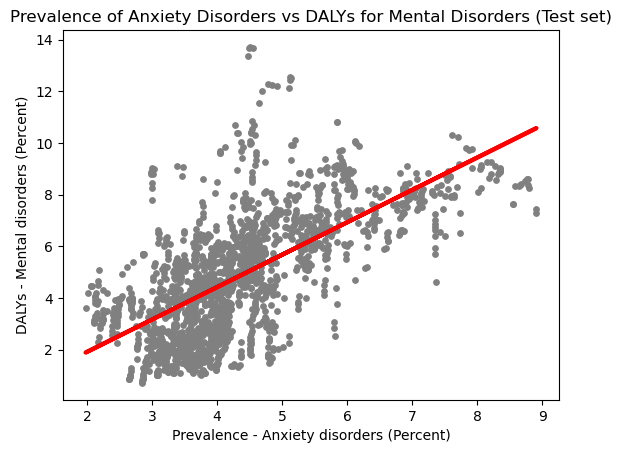

In [46]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Prevalence of Anxiety Disorders vs DALYs for Mental Disorders (Test set)')
plot_test.xlabel('Prevalence - Anxiety disorders (Percent)')
plot_test.ylabel('DALYs - Mental disorders (Percent)')
plot_test.show()

The regression line appears to fit the data well, however, there are a lot of data points above and below the line as well, indicating the line does not fit the data well enough to produce an accurate model. 

In [48]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [50]:
# Print the model summary statistics to check the performance of the model

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.25284693]]
Mean squared error:  3.104761538038118
R2 score:  0.41837658248520415


In [53]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4.760575,4.160943
1,2.734856,4.446926
2,4.405709,4.710140
3,5.659185,3.474509
4,4.816433,4.953775
5,4.872276,4.022808
6,5.597633,5.119559
7,3.617160,3.954413
8,4.062601,3.882502
9,1.719836,3.067095


The mean squared error is high, and the R2 score is below 0.5. Some of the actual and predicted values are very close, however most are very far off. All of these reasons put together indicates that linear regression is not the best prediction model. 